In [328]:
import pandas as pd
import numpy as np
import os
import pickle
import datetime
from datetime import date
from datetime import datetime
from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement
from itertools import combinations
from itertools import permutations
from itertools import product 
import random
import csv
import matplotlib.mlab as mlab
import scipy.linalg as lng # linear algebra from scipy library
import matplotlib . pyplot as plt # library for plots
import matplotlib.animation as animation # lets animate the plots!
from matplotlib.pyplot import figure

In [295]:
# setting saving directory
today = date.today()
now = datetime.now()
print (today)
print (now)
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S") #do not put : or similar 
print("date and time =", dt_string)	    
root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs"

#saving function
def saveAsCSV(df,name,rootdir = root):
    """
    df = dataframe
    name = name for saving in format: 'thisisthename.csv'
    rootdir = local saving directory, default is root
    """
    dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
    savepath = rootdir +'/' + dt_string+'_'+ name 
    df.to_csv ( savepath, index = False, header=True)

#loading function
def loadCSV(name,rootdir = root):
    """
    rootdir = local saving directory, default is root
    name = exact name (including datetime and extention .csv)
    """
    loadpath = rootdir +'/'+ name 
    print ("loading: ",loadpath)
    df = pd.read_csv(loadpath)
    return df


2020-06-21
2020-06-21 14:01:18.881574
date and time = 21-06-2020_14-01-18


In [294]:
os.getcwd()

'C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm'

### loading files

In [276]:
os.getcwd()
os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm')

In [380]:
#loading test sets for validation
test_df_child = loadCSV('21-06-2020_11-20-39_test_df_child.csv')
test_df_adult1 = loadCSV('21-06-2020_11-20-39_test_df_adult1.csv')
test_df_adult2 = loadCSV('21-06-2020_11-20-39_test_df_adult2.csv')
test_df_adult3 = loadCSV('21-06-2020_11-20-39_test_df_adult3.csv')
test_df_adult4 = loadCSV('21-06-2020_11-20-39_test_df_adult4.csv')
test_df_senior = loadCSV('21-06-2020_11-20-39_test_df_senior.csv')


loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_child.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_adult1.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_adult2.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_adult3.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_adult4.csv
loading:  C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs/21-06-2020_11-20-39_test_df_senior.csv


In [381]:
#collect them and their labels
all_test_df = [test_df_child,test_df_adult1,test_df_adult2,test_df_adult3,test_df_adult4,test_df_senior]
all_test_df_labels = ['test_df_child','test_df_adult1','test_df_adult2','test_df_adult3','test_df_adult4','test_df_senior']

In [278]:
#unpickle 3D matrix P_t previously saved
#with open('20-06-2020_14-19-49_P_t_senior.pkl','rb') as f:
    #P_t_senior = pickle.load(f)
    #print(P_t_senior.shape)
    
with open('21-06-2020_11-20-39_P_t_child.pkl','rb') as f:
    P_t_child = pickle.load(f)
    
with open( '21-06-2020_11-20-39_P_t_adult1.pkl','rb') as f:
    P_t_adult1 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_adult2.pkl','rb') as f:
    P_t_adult2 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_adult3.pkl','rb') as f:
    P_t_adult3 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_adult4.pkl','rb') as f:
    P_t_adult4 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_senior.pkl','rb') as f:
    P_t_senior = pickle.load(f)
    

In [279]:
#append all P_t in one vector
all_P_t = []
all_P_t.append(P_t_child)
all_P_t.append(P_t_adult1)
all_P_t.append(P_t_adult2)
all_P_t.append(P_t_adult3)
all_P_t.append(P_t_adult4)
all_P_t.append(P_t_senior)

In [280]:
#append all dataframes_labels in one vector

all_P_t_labels = []
all_P_t_labels.append('P_t_child')
all_P_t_labels.append('P_t_adult1')
all_P_t_labels.append('P_t_adult2')
all_P_t_labels.append('P_t_adult3')
all_P_t_labels.append('P_t_adult4')
all_P_t_labels.append('P_t_senior')

In [288]:
# lets look into them 
counter = 0
for P_t_i in all_P_t:
    t = random.randint(0,144)
    print ("%s at time %s" %(all_P_t_labels[counter],t))
    print (P_t_i[0])
    counter +=1


P_t_child at time 4
[[9.98841251e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.79374276e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.79374276e-04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000

### support functions

In [389]:
# support functions

def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

def printlist(list):
    c = 0
    for element in list:
        c +=1
        print (c,element)
        
def cartesian_product(arr1, arr2): 
    return list(product(arr1, arr2))

def splitstring(word): 
    return [char for char in word]

def keep1(arrayorint):
    """
    array = array of numbers
    """
    if (type(arrayorint) != int):
        new_list =[] 
        for num in arrayorint:
            first_digit = int(str(num)[:1]) 
            new_list.append(first_digit)
        new = np.array(new_list)
    else: 
        new = int(str(arrayorint)[:1]) 
    return new

def takeFirstNum(code):
    """
    works only if code is in string format!
    """
    code_list = splitstring(code)
    list_map = (map(int, code_list))
    list_of_integers  = []
    for num in list_map:
        list_of_integers.append(int(num))
        #print (num)
    x = list_of_integers[0]
    return x

def takeSecNum(code):
    """
    works only if code is in string format!
    """
    code_list = splitstring(code)
    list_map = (map(int, code_list))
    list_of_integers  = []
    for num in list_map:
        list_of_integers.append(int(num))
        #print (num)
    x = list_of_integers[1]
    return x

# to simplify the activity lists
def keepOne(arrayorint):
    """
    array = array of numbers
    """
    if (type(arrayorint) != int):
        new_list =[] 
        for num in arrayorint:
            first_digit = int(np.floor(num / 1000))
            new_list.append(first_digit)
        new = np.array(new_list)
    else: 
        new = int(np.floor(arrayorint / 1000))
    return new

In [390]:
keepOne([ 110,  111, 3110, 5120,  210,  300, 3710, 9890, 3440, 8210, 8110,
       7241, 3430,  310, 8120,  390, 9310, 9510, 3000, 1000, 3130, 8212,
       8219, 9960, 5140, 3210, 3620, 5190, 9000, 5310, 4320, 9940, 4300,
       7170, 6110, 3611, 9360, 9370, 3630, 7310, 3310, 3240, 3540, 3410,
       9120, 1110, 1390, 9950, 3520, 3610, 9500, 3539, 5240, 7330, 8000,
       8100, 7250, 9970, 9430, 3290, 3320, 4210, 3929, 4220, 8310, 3230,
       4281, 4200, 7121, 5110, 4250, 6131, 6120, 8320, 3250, 9990, 3613,
       3420, 8229, 9520, 5294, 4230, 4279, 9820, 9420, 9610, 6190, 3721,
       8190, 4110, 8220, 9410, 7251, 3921, 3911, 9390, 3722, 9980, 6111,
       7259, 3220, 5290, 7231,    0, 7329, 8300, 8211, 3830, 5299, 6149,
       6150, 6144, 5250, 3619, 9800, 4273, 3920, 8319, 3727, 7239, 6160,
       3600, 3530, 3910, 1120, 3190, 9999, 3330, 9230, 4271, 7321, 1310,
       5210, 5223, 6143, 4120, 3819, 9720, 7190, 3725, 9380, 4274, 4310,
       9810, 7100, 7112, 6119, 3720, 9600, 3615, 4240, 3140, 9010, 2210,
       7130, 7111, 9440, 3200, 7322, 6100, 3919, 5230, 5291, 6140, 4270,
        120, 5241, 5249, 3729, 7220, 5295, 7340, 3820, 9210, 4283, 9710,
       7240, 3690, 6171, 9110, 5130, 6000, 4000, 3100, 6141, 3500, 3390,
       8221, 3614, 3810, 3811, 1210, 3612, 7300, 3914, 2110, 8312, 3490,
       8311, 4289, 7230, 6130, 3531, 5221, 6311, 5100, 9400, 4190, 6210,
       7390, 1100, 3724, 5000, 2100, 1399, 4260, 1300, 5229, 9100, 9130,
       3590, 5220, 6312, 3924, 3300, 4272, 7249])

array([0, 0, 3, 5, 0, 0, 3, 9, 3, 8, 8, 7, 3, 0, 8, 0, 9, 9, 3, 1, 3, 8,
       8, 9, 5, 3, 3, 5, 9, 5, 4, 9, 4, 7, 6, 3, 9, 9, 3, 7, 3, 3, 3, 3,
       9, 1, 1, 9, 3, 3, 9, 3, 5, 7, 8, 8, 7, 9, 9, 3, 3, 4, 3, 4, 8, 3,
       4, 4, 7, 5, 4, 6, 6, 8, 3, 9, 3, 3, 8, 9, 5, 4, 4, 9, 9, 9, 6, 3,
       8, 4, 8, 9, 7, 3, 3, 9, 3, 9, 6, 7, 3, 5, 7, 0, 7, 8, 8, 3, 5, 6,
       6, 6, 5, 3, 9, 4, 3, 8, 3, 7, 6, 3, 3, 3, 1, 3, 9, 3, 9, 4, 7, 1,
       5, 5, 6, 4, 3, 9, 7, 3, 9, 4, 4, 9, 7, 7, 6, 3, 9, 3, 4, 3, 9, 2,
       7, 7, 9, 3, 7, 6, 3, 5, 5, 6, 4, 0, 5, 5, 3, 7, 5, 7, 3, 9, 4, 9,
       7, 3, 6, 9, 5, 6, 4, 3, 6, 3, 3, 8, 3, 3, 3, 1, 3, 7, 3, 2, 8, 3,
       8, 4, 7, 6, 3, 5, 6, 5, 9, 4, 6, 7, 1, 3, 5, 2, 1, 4, 1, 5, 9, 9,
       3, 5, 6, 3, 3, 4, 7])

### main simulation

In [399]:
def SimulateActivitiesForThisListoFPeople(list_of_P_t, numdays):
    """
    list_of_P_t : as input we have a list of people aka a list of transition matrices
                    this is eg to rapresent an household of two kids, two adults 30-45 and one adult >75
    numdays: how many days we want to get
    """
    familysize = len(list_of_P_t)
    print ("lets simulate a family of %i, for %i days" %(familysize,numdays))
    
    #container to get the activitylist of each family member
    container_activityLists = [[] for i in range(familysize)]
    
    for i in range(familysize):
        transitionMatrix = list_of_P_t[i]
        activityToday = 0
        
        #get the activities simulated according to the right transition Matrix
        activityList = ForecastAcitivtiesforNdays(transitionMatrix,i,activityToday, numdays)
        
        #add them to the container
        container_activityLists[i]= (activityList)
    
    return container_activityLists
    
def ForecastAcitivtiesforNdays(transitionMatrix,i = 0, activityToday = 0, days =1):
    #get the sim activity list
    #this list is 144*numdays
    activityList = activity_forecast(transitionMatrix,activityToday,days)
    #print (type(activityList))
    
    #save it proper 
    #in reality i am already saving out of here so...
    #savelabel ='SimActivities_'+all_P_t_labels[i]+'_NumOfDays_'+str(days)+".csv"
    
    #plot it
    plot_lenght = days*7
    plot_height = 4
    if plot_lenght>200:
        plot_lenght= 200
        plot_height = 8
    figure(figsize=(plot_lenght,plot_height))
    T = np.arange(len(activityList))
    
    plt.plot(T, activityList)
    plt.title('%s'%(all_P_t_labels[i]))
    plt.xlabel('time')
    plt.ylabel('activities')

    plt.xticks(np.arange(min(T), max(T)+1, 143))
    plt.yticks(np.arange(min(activityList), max(activityList), 1))
    plt.grid(axis='activityList', linestyle='-')
    return activityList

#main
def activity_forecast(transitionMatrix,activityToday = 0, days =1,time_steps = 144):
    
    # Choose the starting state
    # shall this be random? 
    #activityToday = random.choice(states_id1)
    
    # Or we choose the starting state as sleep? 
    #activityToday = 0 #num int
    
    #anyhow append in the activity list
    activityList = [activityToday]
    prob = 1
    period = days*144
    for day in range(days):
        for t in range(1,time_steps):#zero is already appended!
            for current_state in states_id1: # we look for the activiy code in the array of possible states
                if activityToday != current_state:
                    continue
                else: # as soon as we 
                    #index = takeFirstNumOfCode(code) #no real need for this, me dumb
                    #print (sum(transitionMatrix[t][current_state]))
                    if (sum(transitionMatrix[t][current_state]) == 0):
                        #print (t,current_state)
                        activityToday = current_state
                        activityList.append(current_state)

                    else:
                        change = np.random.choice(transition_array[current_state],replace=True,p=transitionMatrix[t][current_state])
                        for transition in transitionName[current_state]:
                            if change != transition: #type string 
                                continue
                            else:
                                next_state = takeSecNum(change)
                                prob = prob * transitionMatrix[t][current_state][next_state]
                                activityToday = next_state
                                activityList.append(next_state)
                                break
                        break
    return activityList

In [377]:
timesteps = []
for ts in range(0,144):
    timesteps.append(ts)
    
np.mean(timesteps[-144:])
    

71.5

In [291]:
# the statespace
states_id1 = [0,1,2,3,4,5,6,7,8,9]
states_id2 = [0,1,2,3,4,5,6,7,8,9] #10 possible unique activties 
states = ["PERSONAL CARE","EMPLOYMENT","STUDY","HOUSEHOLD AND FAMILY CARE","VOLUNTEER WORK AND MEETING","SOCIAL LIFE AND ENTERTAINMENT","SPORTS AND OUTDOOR ACTIVITIES","HOBBIES, GAMES, AND COMPUTING","MASS MEDIA","TRAVEL AND UNSPECIFIED TIME USE"]

# all possibile sequences of couples of activities
# the activity can be the same before and after so (0,0) (1,1) are acceptable combinations
transitionCodes =cartesian_product(states_id1,states_id2)
transitionCoordinates = []
transitionName = [[],[],[],[],[],[],[],[],[],[]] #ten subarrays
#there is a better way to do this:
#transitionName = [[] for i in range(num_of_subarrays)]

allchunks = chunks(transitionCodes, len(states))

counter= 0
for item in allchunks:
    #print("transitionCoordinates[%i]: %s"%(counter,item))
    transitionCoordinates.append(item)
    counter += 1
    
counter= 0
for j in range(10):
    for k in range(10):
        d = transitionCoordinates[j][k][0] # decine, left element (d,)
        u = transitionCoordinates[j][k][1] # units, right element ,u)
        tot = ('%i%i'%(d,u))
        #print (counter,tot)
        transitionName[counter].append(tot)
    counter += 1
print ((transitionName[0]))
transition_array = np.array(transitionName)


['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


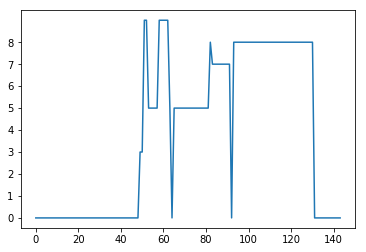

In [352]:
# SIMULATE ONE DAY
# note: at time it returns error because the sum of the row of P_t[t given] [j initial state] is not 1. 
# this shouldnt be possible. there must always be one state to move to (at least the same state!)
# how to catch why some lines at t = 0 are all zeros? 
transitionMatrix = P_t_senior
activityList = activity_forecast(transitionMatrix,0)
T = np.arange(144)
plt.plot(T, activityList)
plt.yticks(np.arange(min(activityList), max(activityList), 1))
plt.grid(axis='activityList', linestyle='-')

https://stackoverflow.com/questions/46539431/np-random-choice-probabilities-do-not-sum-to-1
This is a known numpy bug.


In [271]:
#transitionMatrix[86][4] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [362]:
#SIMULATE MANY DAYS
# To save every activityList
list_activity = []
count = 0

# lets simulate one year
for iterations in range(0,8):
        list_activity.append(activity_forecast(transitionMatrix,0))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == 0):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:0 and ending at state: 0'= " + str(percentage) + "%")

The probability of starting at state:0 and ending at state: 0'= 0.08%


In [363]:
len(list_activity)

8

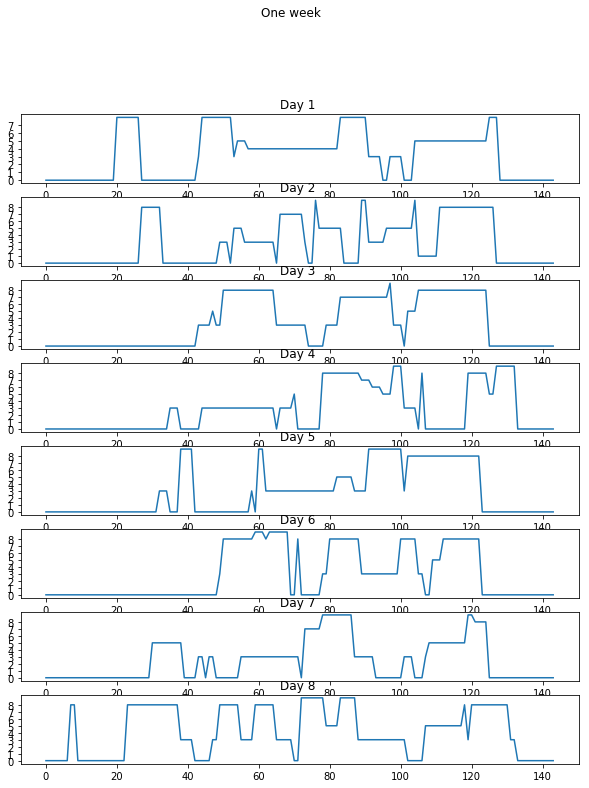

In [364]:
fig = plt.figure(figsize=(10, 15))
fig.suptitle('One week')

counter = 1
for activityList in list_activity: 
    ax =  fig.add_subplot(10,1,counter)
    ax.set_title('Day %i '%counter)
    T = np.arange(144)
    plt.plot(T, activityList)
    plt.yticks(np.arange(min(activityList), max(activityList), 1))
    plt.grid(axis='activityList', linestyle='-')
    counter +=1

In [348]:
os.getcwd()
os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\activityLists')

lets simulate a family of 5, for 7 days


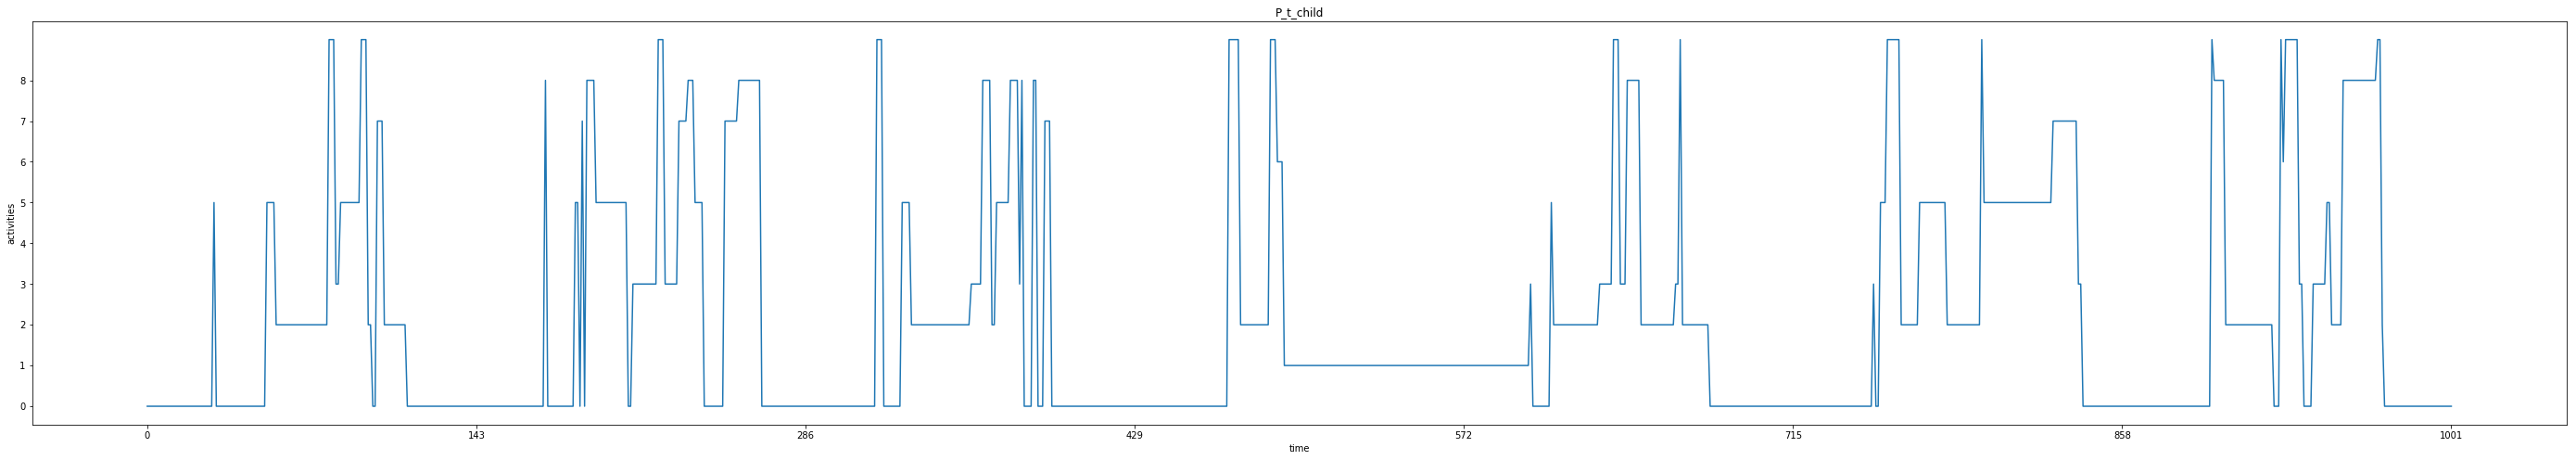

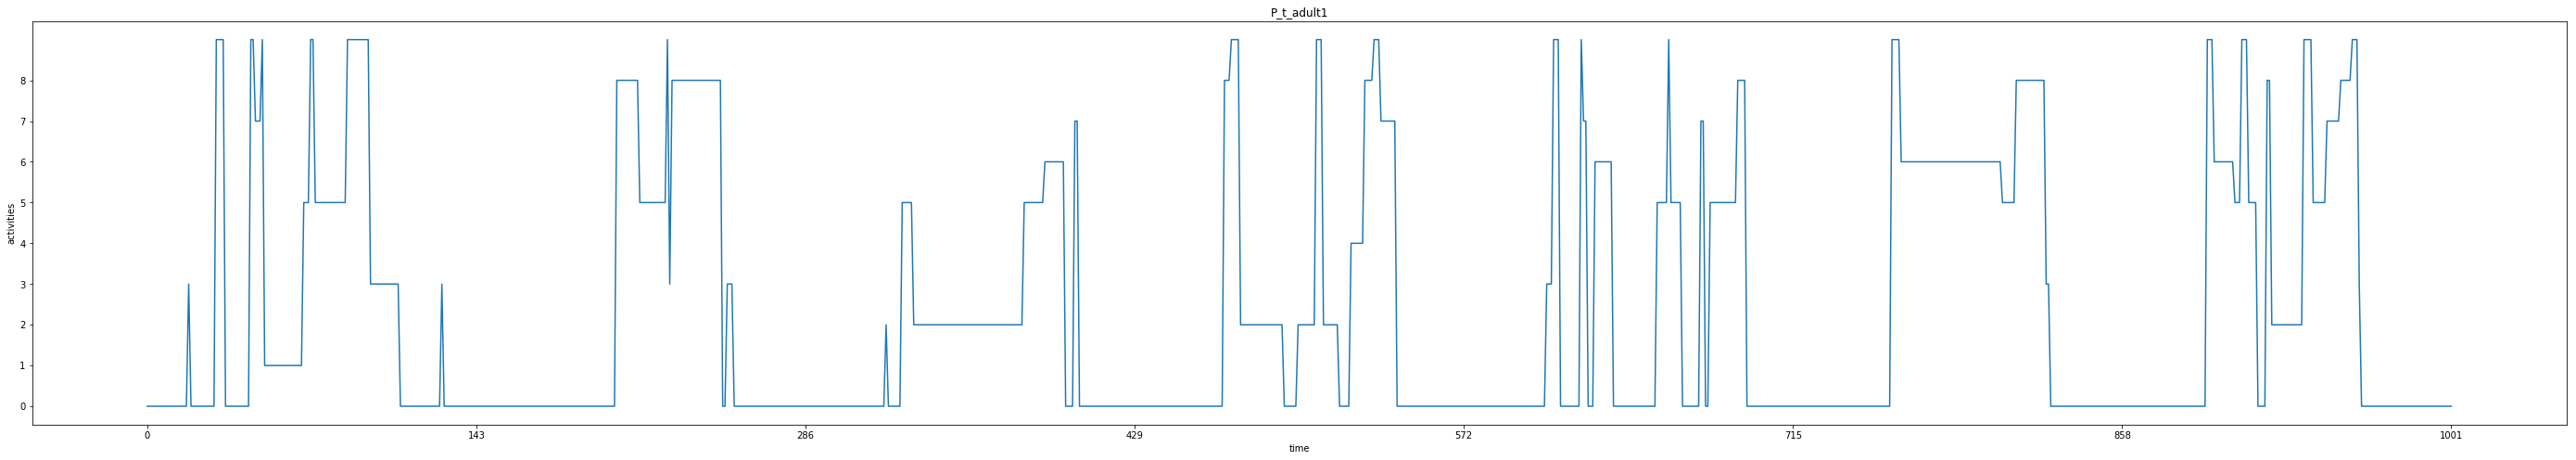

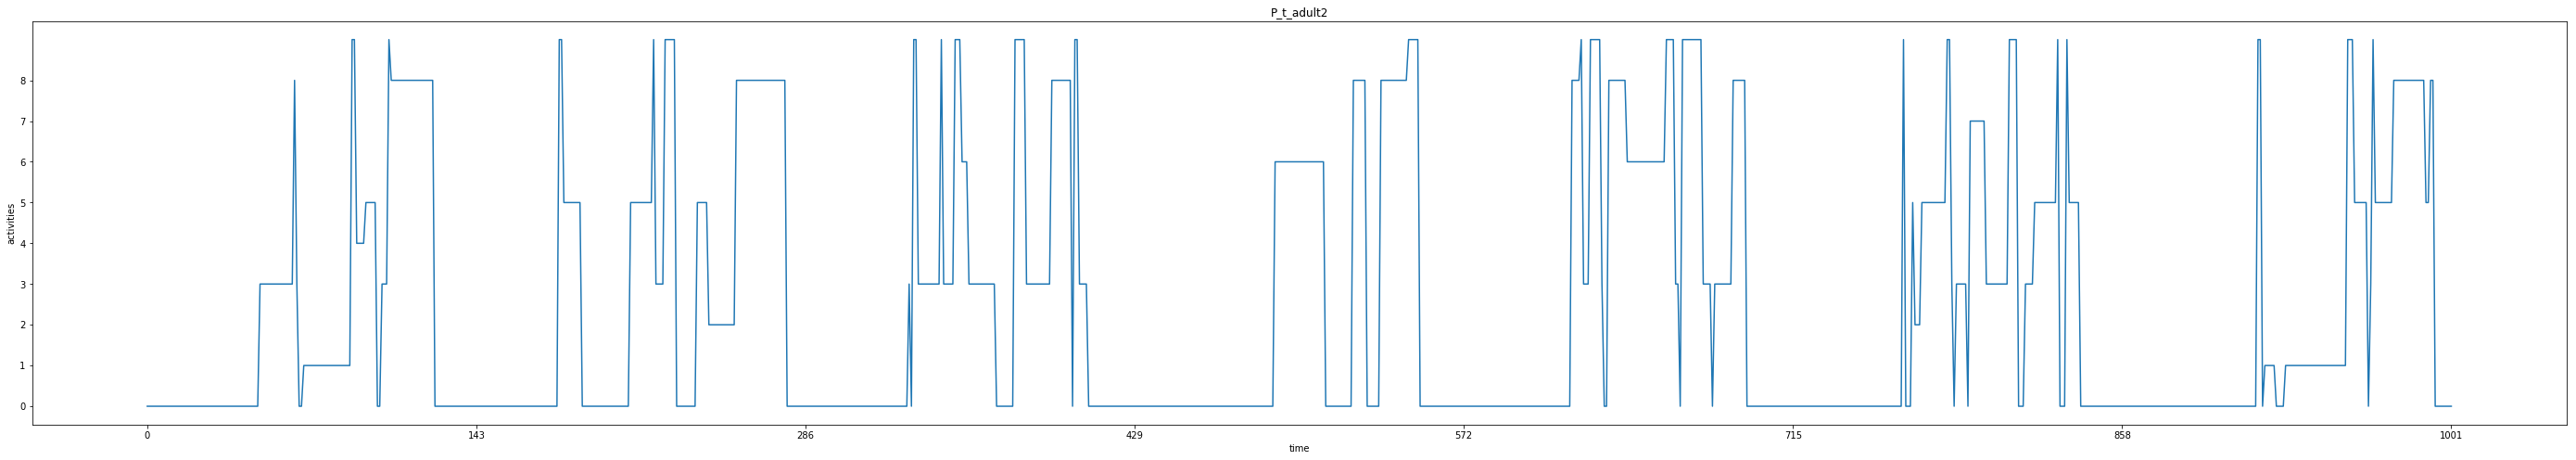

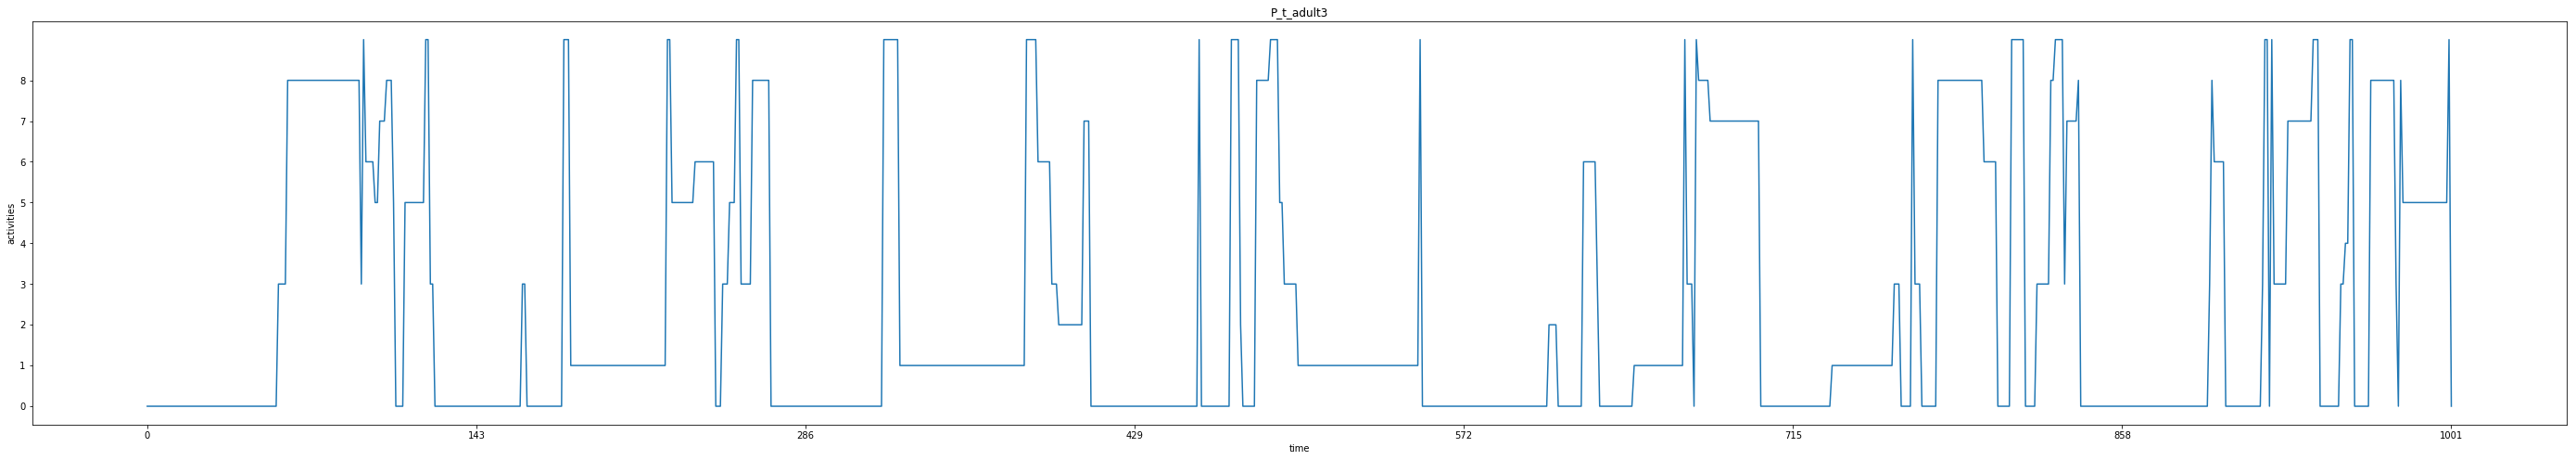

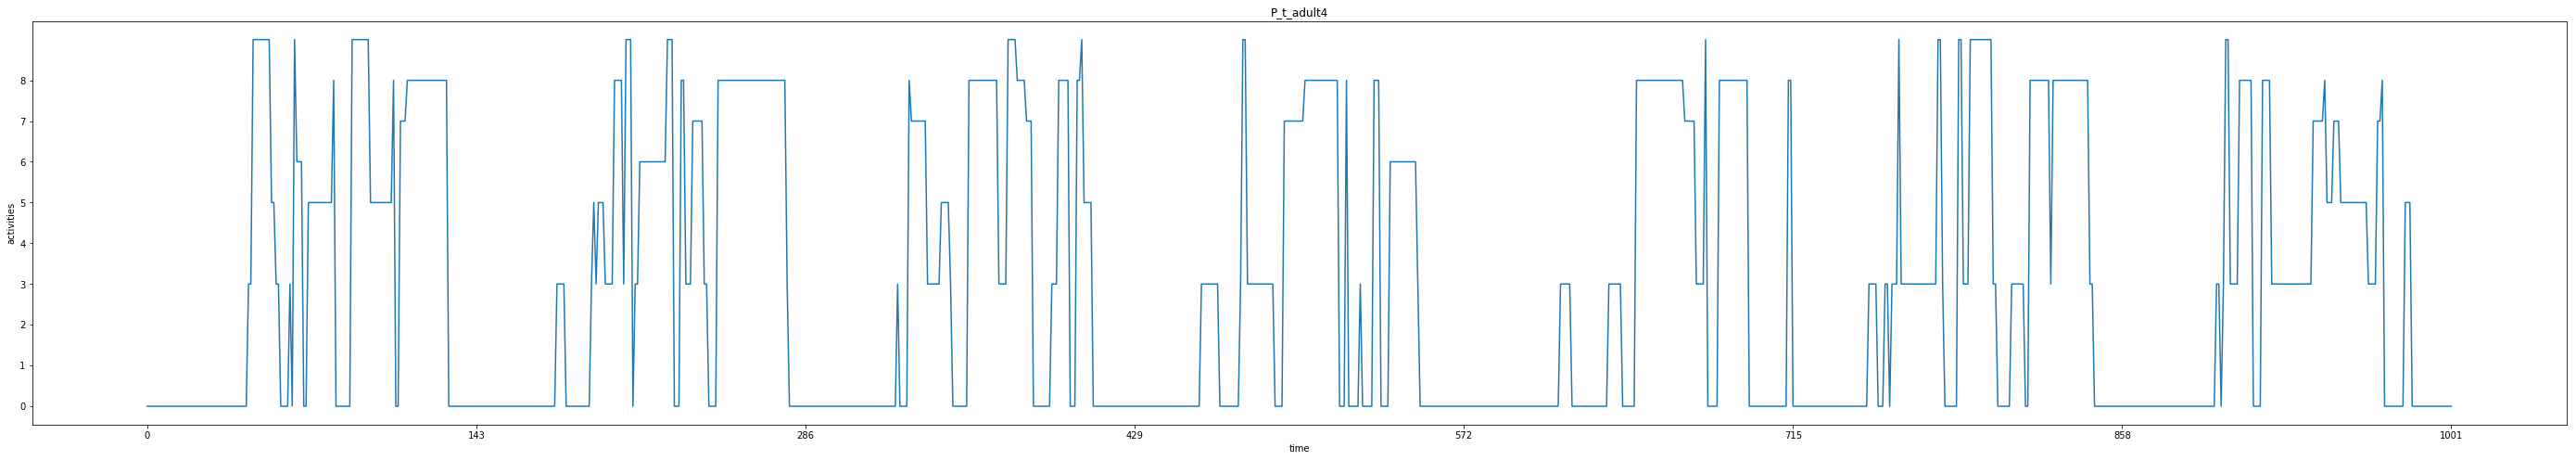

In [365]:
#SIMULATE A FAMILY OF PEOPLE FOR N DAYS 
list_of_people = []
list_of_people.append(P_t_child)
list_of_people.append(P_t_child)
list_of_people.append(P_t_adult1)
list_of_people.append(P_t_adult1)
list_of_people.append(P_t_senior)

days = 7

container_activityLists = SimulateActivitiesForThisListoFPeople(list_of_people,days)

dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel ='SimActivities_'+str(len(list_of_people))+'_People_'+'_NumOfDays_'+str(days)+".csv"
with open( savelabel,'wb') as f:
    pickle.dump(container_activityLists, f)

lets simulate a family of 2, for 365 days


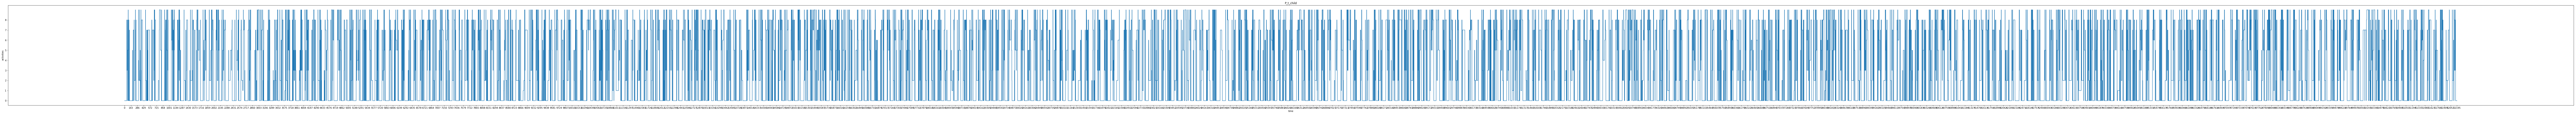

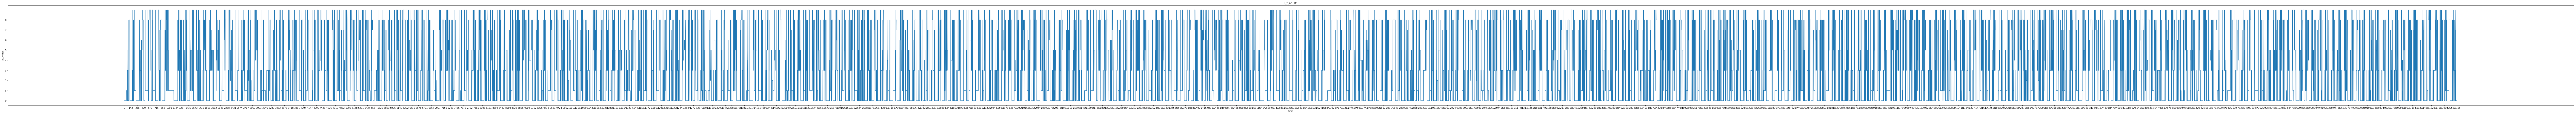

In [371]:
#SIMULATE TWO PERSONS FOR 365 DAYS 
list_of_people = []
#list_of_people.append(P_t_child)
list_of_people.append(P_t_child)
list_of_people.append(P_t_adult3)
#list_of_people.append(P_t_adult1)
#list_of_people.append(P_t_senior)

days = 365

container_activityLists = SimulateActivitiesForThisListoFPeople(list_of_people,days)

dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel ='SimActivities_'+str(len(list_of_people))+'_People_'+'_NumOfDays_'+str(days)+".csv"
with open( savelabel,'wb') as f:
    pickle.dump(container_activityLists, f)

### Validation

In order to validate our model, we take the test sets that we had built previously with sklearn.model_selection, train_test_split.

We will try to predict the next activity of activities that were not in the "training set" used to build the transition matrices.

In [433]:
def validate(TEST_df_test):
    TEST_df_test["Current_Activity_short"] = TEST_df_test["whatdoing_exact"].apply(keepOne)
    TEST_df_test["Next_Activity_short"] = TEST_df_test["Next_activity"].apply(keepOne)
    
    predicted_next_activities = []
    for i in range(len(TEST_df_test["Next_Activity_short"])):

        transitionMatrix = all_P_t[0] #P_t_child
        currentactivity = TEST_df_test["Current_Activity_short"][i]
        days =1
        time_steps = 1 # we want only to predict ONE step ahead

        #activity_forecast(transitionMatrix,currentactivity = 0, days =1,time_steps = 144):
        nextactivity = activity_forecast(transitionMatrix,currentactivity,days,time_steps)
        predicted_next_activities.append(nextactivity)
        
    validation = [] # 1 for same, zero for different
    for i in range(len(TEST_df_test["Next_Activity_short"])):
        real_next_activity = TEST_df_test["Next_Activity_short"][i]
        predicted_next_activity = predicted_next_activities[i]
        if (real_next_activity == predicted_next_activity):
            validation.append(1)
        else: 
            validation.append(0)
    correct_predictions = sum(validation)
    tot_predictions = len(validation)
    indices_of_wrong_prediction = [i for i, x in enumerate(validation) if x == 0]
    print ("overall the model was able to predict correctly %.2f percent of the next actions" %(correct_predictions*100/tot_predictions))    
    
    return predicted_next_activities,validation

In [ ]:
#all_test_df = [test_df_child,test_df_adult1,test_df_adult2,test_df_adult3,test_df_adult4,test_df_senior]
#all_test_df_labels = ['test_df_child','test_df_adult1','test_df_adult2','test_df_adult3','test_df_adult4','test_df_senior']

In [435]:
container_predicted_next_activities = [[] for i in range(len(all_test_df))]
container_validation = [[] for i in range(len(all_test_df))]

counter = 0
for test_df in all_test_df:
    predicted_next_activities,validation = validate(test_df)
    container_predicted_next_activities[counter]= (predicted_next_activities)
    container_validation[counter]= (validation)
    counter += 1
    

overall the model was able to predict correctly 89.70 percent of the next actions
overall the model was able to predict correctly 89.41 percent of the next actions
overall the model was able to predict correctly 88.08 percent of the next actions
overall the model was able to predict correctly 87.94 percent of the next actions
overall the model was able to predict correctly 86.34 percent of the next actions
overall the model was able to predict correctly 86.91 percent of the next actions


### One single example 

In [404]:
TEST_df_test = test_df_child
#print(TEST_df_test.columns)
TEST_df_test["Current_Activity_short"] = TEST_df_test["whatdoing_exact"].apply(keepOne)
TEST_df_test["Next_Activity_short"] = TEST_df_test["Next_activity"].apply(keepOne)
print(TEST_df_test["Next_Activity_short"][1])
print(len(TEST_df_test["Next_Activity_short"]))
print(len(TEST_df_test["Current_Activity_short"]))

8
64640
64640


In [424]:
predicted_next_activities = []
for i in range(len(TEST_df_test["Next_Activity_short"])):
    
    transitionMatrix = all_P_t[0] #P_t_child
    currentactivity = TEST_df_test["Current_Activity_short"][i]
    days =1
    time_steps = 1 # we want only to predict ONE step ahead

    #activity_forecast(transitionMatrix,currentactivity = 0, days =1,time_steps = 144):
    nextactivity = activity_forecast(transitionMatrix,currentactivity,days,time_steps)
    predicted_next_activities.append(nextactivity)

In [413]:
# check how was the prediction!
validation = [] # 1 for same, zero for different
for i in range(len(TEST_df_test["Next_Activity_short"])):
    real_next_activity = TEST_df_test["Next_Activity_short"][i]
    predicted_next_activity = predicted_next_activities[i]
    if (real_next_activity == predicted_next_activity):
        validation.append(1)
    else: 
        validation.append(0)
correct_predictions = sum(validation)
tot_predictions = len(validation)
indices_of_wrong_prediction = [i for i, x in enumerate(validation) if x == 0]
print ("overall the model was able to predict correctly %.2f percent of the next actions" %(correct_predictions*100/tot_predictions))

        
    

overall the model was able to predict correctly 89.70 percent of the next actions


### check on the mistakes made

In [410]:
correct_predictions

57983

In [411]:
tot_predictions

64640

In [428]:
print (TEST_df_test["Current_Activity_short"][8])
print (TEST_df_test["Next_Activity_short"][8])
print (predicted_next_activities[8][0])

9
8
9


In [430]:
for i in indices_of_wrong_prediction:
    curra = TEST_df_test["Current_Activity_short"][i]
    nexta = TEST_df_test["Next_Activity_short"][i]
    preda = predicted_next_activities[i][0]
    if (preda != curra):
        print ("wrongly predicted index: %i" %i)
        print (TEST_df_test.loc[i,:])
        print ("Next activity: %s; Predicted: %s" %(nexta,preda))
        print ("")

In [432]:
for i in range(len(validation)):
    curra = TEST_df_test["Current_Activity_short"][i]
    nexta = TEST_df_test["Next_Activity_short"][i]
    preda = predicted_next_activities[i][0]
    if (preda != curra) & (preda == nexta):
        print ("%i Current activity: %s;  Next activity: %s;  Predicted: %s" %(i, curra, nexta,preda))
        print ("")
    

it has issues in predicting unusual trasitions from one state to a different one.